In [20]:
# import libraries
import torch
import torch.nn as nn
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

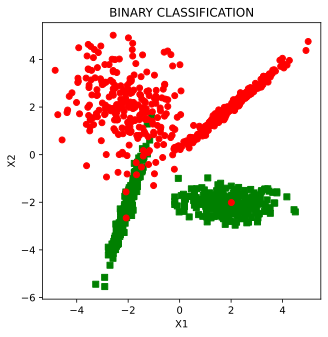

In [21]:
from sklearn.datasets import make_classification


X,y = make_classification(n_samples=1000, n_features=2, 
                    n_informative=2, n_redundant=0, n_repeated=0, n_classes=2,
                    n_clusters_per_class=2, weights=None, flip_y=0.01, 
                    class_sep=2.0, hypercube=True, shift=0.0, scale=1.0, 
                    shuffle=True, random_state=42)

# convert to a pytorch tensor
data = torch.tensor(X).float()
labels = torch.tensor(y).float()
labels = labels.view(-1, 1)

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'gs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ro')
plt.title('BINARY CLASSIFICATION')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [40]:
def CreateModel(learningRate):

  # model architecture
  ANN = nn.Sequential(
      nn.Linear(2,16),
      nn.ReLU(),
      nn.Linear(16,1),   # output unit
        )

  # loss function
  lossfunc = nn.BCEWithLogitsLoss()

  # optimizer
  optim = torch.optim.SGD(ANN.parameters(),lr=learningRate)

  # model output
  return ANN,lossfunc,optim


In [36]:
# a fixed parameter
epochs = 1000

def train(ANNmodel):
    
    # initialize losses
    losses = torch.zeros(epochs)

    # loop over epochs
    for i in range(epochs):

        # forward pass
        pred = ANNmodel(data)

        # compute loss
        loss = lossfunc(pred,labels)
        losses[i] = loss

        # backprop
        optim.zero_grad()
        loss.backward()
        optim.step()
  
  
  
    # final forward pass
    predictions = ANNmodel(data)

    # compute the predictions and report accuracy
    # NOTE: shouldn't it be predictions>.5??
    totalacc = 100*torch.mean(((predictions>0) == labels).float())

    return losses,predictions,totalacc

Final accuracy: 86.2%


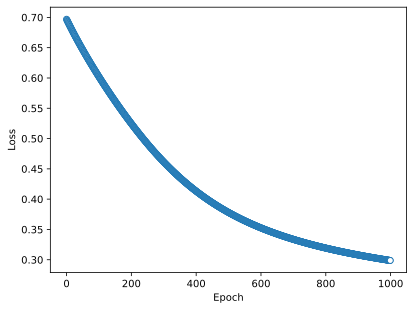

In [41]:
# create everything
ANN,lossfunc,optim = CreateModel(.01)

# run it
losses,predictions,totalacc = train(ANN)

# report accuracy
print('Final accuracy: %g%%' %totalacc)


# show the losses
plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch'), plt.ylabel('Loss')
plt.show()

In [24]:
# the set of learning rates to test
learningrates = np.linspace(.001,.1,10)
learningrates = np.round(learningrates, 2)
# initialize results output
accByLR = []
allLosses = np.zeros((len(learningrates),epochs))


# loop through learning rates
for i,lr in enumerate(learningrates):
  
    # create and run the model
    ANN,lossfunc,optim = CreateModel(lr)
    losses,predictions,totalacc = train(ANN)

    # store the results
    accByLR.append(totalacc)
    allLosses[i,:] = losses.detach()

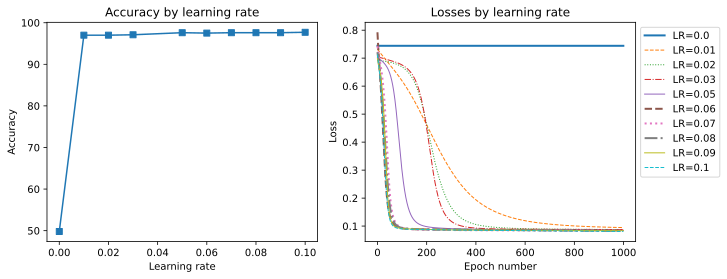

In [42]:
# Create a colormap
cmap = plt.get_cmap('tab10')

# Define custom line styles
line_styles = [
    ('-', 2),   # Solid line, bold
    ('--', 1),  # Dashed line, normal
    (':', 1),   # Dotted line, normal
    ('-.', 1),  # Dash-dot line, normal
    ('-', 1),   # Solid line, normal
    ('--', 2),  # Dashed line, bold
    (':', 2),   # Dotted line, bold
    ('-.', 2),  # Dash-dot line, bold
    ('-', 1),   # Solid line, normal
    ('--', 1)   # Dashed line, normal
]

# plot the results
fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(learningrates,accByLR,'s-')
ax[0].set_xlabel('Learning rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by learning rate')

# Plot losses by learning rate with customized line styles
for i, lr in enumerate(learningrates):
    linestyle, linewidth = line_styles[i % len(line_styles)]
    ax[1].plot(allLosses[i], label=f'LR={lr}', color=cmap(i % 10), linestyle=linestyle, linewidth=linewidth)

ax[1].set_title('Losses by learning rate')
ax[1].set_xlabel('Epoch number')
ax[1].set_ylabel('Loss')

# Add legend outside of the second subplot
ax[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show the plot
plt.show()

In [26]:
accByLR

[tensor(49.8000),
 tensor(97.),
 tensor(97.),
 tensor(97.1000),
 tensor(97.6000),
 tensor(97.5000),
 tensor(97.6000),
 tensor(97.6000),
 tensor(97.6000),
 tensor(97.7000)]

In [27]:
sum(torch.tensor(accByLR)>70)/len(accByLR)

tensor(0.9000)

In [28]:
def CreateModel(learningRate):
    ANN = nn.Sequential(
        nn.Linear(2,16),
        nn.ReLU(),
        nn.Linear(16,1)
    )
    lossfunc = nn.BCEWithLogitsLoss()
    optim = torch.optim.SGD(ANN.parameters(), lr=learningRate)
    return ANN, lossfunc, optim


In [29]:
def CreateModel(learningRate):
    ANN = nn.Sequential(
        nn.Linear(2,32),
        nn.ReLU(),
        nn.Linear(32,1)
    )
    lossfunc = nn.BCEWithLogitsLoss()
    optim = torch.optim.SGD(ANN.parameters(), lr=learningRate)
    return ANN, lossfunc, optim


In [30]:
def CreateModel(learningRate):
    ANN = nn.Sequential(
        nn.Linear(2,16),
        nn.ReLU(),
        nn.Linear(16,16),
        nn.ReLU(),
        nn.Linear(16,16),
        nn.ReLU(),
        nn.Linear(16,16),
        nn.ReLU(),
        nn.Linear(16,1)
    )
    lossfunc = nn.BCEWithLogitsLoss()
    optim = torch.optim.SGD(ANN.parameters(), lr=learningRate)
    return ANN, lossfunc, optim


In [31]:
def CreateModel(learningRate):
    ANN = nn.Sequential(
        nn.Linear(2,32),
        nn.ReLU(),
        nn.Linear(32,32),
        nn.ReLU(),
        nn.Linear(32,32),
        nn.ReLU(),
        nn.Linear(32,32),
        nn.ReLU(),
        nn.Linear(32,1)
    )
    lossfunc = nn.BCEWithLogitsLoss()
    optim = torch.optim.SGD(ANN.parameters(), lr=learningRate)
    return ANN, lossfunc, optim


In [32]:
def CreateModel(learningRate):
    ANN = nn.Sequential(
        nn.Linear(2,8),
        nn.ReLU(),
        nn.Linear(8,8),
        nn.ReLU(),
        nn.Linear(8,8),
        nn.ReLU(),
        nn.Linear(8,8),
        nn.ReLU(),
        nn.Linear(8,1)
    )
    lossfunc = nn.BCEWithLogitsLoss()
    optim = torch.optim.SGD(ANN.parameters(), lr=learningRate)
    return ANN, lossfunc, optim


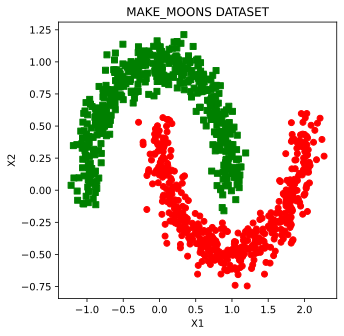

In [33]:
from sklearn.datasets import make_moons

# Create dataset
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)

# Convert to torch tensors
data = torch.tensor(X).float()
labels = torch.tensor(y).float().view(-1, 1)

# Visualize
plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1], 'gs')
plt.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1], 'ro')
plt.title('MAKE_MOONS DATASET')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()
